<a href="https://colab.research.google.com/github/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Remittance_Patterns_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remittance Patterns and Economic Development

<a id='Introduction'></a>
# Description of dataset

This notebook shows the exploratory data analysis of datasets regarding worldwide economic remittances. The data used for this analysis is from [the Global Knowledge Partnership on Migration and Development (KNOMAD)](https://www.knomad.org/data/remittances) website in their broader effort to fill the knowledge gaps for monitoring and analyzing migration and remittances. It provides remittance data movements (inbound and outbound) between various countries. 

The codes for data cleaning can be found on these links [Remittance inflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Inflows.ipynb) and [Remittance outflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Outflows.ipynb).

Summary Content:
* Number of countries involved: 214
* Time period: 1990 till 2022
* Unit of measurement: All values are in terms of millions of US dollars.
* This dataset contains three files:
    * `bilateral_remittance_matrix.csv` - Estimated remittances between world countries in the year 2021.
    * `remittance_inflows.csv` - Historical remittance money inflow into world countries since 1990. 
    * `remittance_outflows.csv` - Historical remittance money outflow from world countries since 1990. 

The dataset has been cleaned for use in this project. The codes for the data cleaning can be viewed on following Github links [Remittance Inflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Inflows.ipynb) and [Remittance ouflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Outflows.ipynb).

To get the subregion for each country, dataset was combined with the country to continent dataset from [Kaggle](https://www.kaggle.com/datasets/statchaitya/country-to-continent/download?datasetVersionNumber=1). 

**All monetary values are in terms of millions of US dollars**.

## Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# filepaths
path1 = '/content/remittance_inflows.csv'
path2 = '/content/remittance_outflows.csv'
path3 = '/content/bilateral_remittance_matrix.csv'

In [3]:
# Load datasets
inflow = pd.read_csv(path1, encoding = "ISO-8859-1")
outflow = pd.read_csv(path2, encoding = "ISO-8859-1")
bilateral = pd.read_csv(path3,index_col=0,encoding = "ISO-8859-1")

In [4]:
# Snippet of 'inflow' Dataframe
inflow

,Migrant remittance inflows (US$ million),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,%GDP_2022
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,2.058824
1,Albania,0.000000,0.000000,151.800000,332.000000,307.100000,427.300000,550.900000,300.300000,504.140000,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,9.859772
2,Algeria,352.441760,232.990263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,0.977510
3,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.142000,0.000000,0.000000,...,30.971119,11.114712,3.988048,1.418196,1.579247,3.445473,8.053051,12.631149,16.420494,0.013158
4,Antigua and Barbuda,9.400000,0.000000,0.000000,7.925926,8.614815,0.000000,8.940741,9.537037,18.755556,...,32.100000,31.244412,26.705676,24.020044,32.768265,36.955426,36.331448,50.142028,34.590023,2.044328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Vanuatu,6.888202,6.967351,6.813023,4.943892,5.758934,6.128564,0.000000,0.000000,7.780196,...,64.091052,104.193107,80.534471,26.177844,35.219416,74.997098,97.953384,169.012066,75.000000,7.621951
167,Vietnam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12000.000000,13000.000000,14000.000000,15000.000000,16000.000000,17000.000000,17200.000000,18060.000000,19000.000000,4.591501
168,West Bank and Gaza,0.000000,0.000000,0.000000,0.000000,0.000000,582.100000,542.300000,623.300000,1058.245498,...,1804.542445,1817.412109,2086.576176,2378.923437,2833.912788,3152.859814,2559.660846,3393.364900,3495.165847,18.573525
169,Zambia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.300302,47.046538,38.464441,93.644095,106.965626,98.259121,134.864832,241.688413,260.150000,0.962627


In [5]:
# Summary Statistics
inflow.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
1990,171.000000,330.771219,909.880607,0.000000,0.000000,0.487599,90.351817,5025.494576
1991,171.000000,338.415741,902.012902,0.000000,0.000000,0.077778,102.612461,4808.500000
1992,171.000000,381.109274,1005.609170,0.000000,0.000000,0.870370,120.125322,6104.000000
1993,171.000000,384.208500,965.179697,0.000000,0.000000,9.618519,152.201094,5664.000000
1994,171.000000,413.050914,968.817091,0.000000,0.000000,11.401200,191.062732,5856.694458
1995,171.000000,477.173096,1093.394875,0.000000,0.000000,15.021584,308.100000,6222.996282
1996,171.000000,502.095190,1176.147930,0.000000,0.000000,19.318019,302.726101,8765.693607
1997,171.000000,596.126855,1491.755043,0.000000,0.000000,23.000000,413.800000,10330.965040
1998,171.000000,581.109846,1449.033783,0.000000,0.000000,28.939395,452.523412,10021.054780
1999,171.000000,668.818097,1589.099658,0.000000,0.000000,42.528020,526.876373,11124.280840


From the above line of code, `df.describe().T.style.background_gradient(cmap='viridis')` creates a styled representation of the summary statistics DataFrame, with the values colored according to their relative magnitude. This can be useful for quickly identifying which columns have higher or lower mean, median, or other statistics, and for identifying any outliers or skewness in the data.

In [6]:
# Snippet of outflow dataset
outflow.head()

,Outward remittance flows (US$ million),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,%GDP_2021
0,Angola,150.000000,124.500000,121.63700,132.900000,148.900000,209.5460,173.802000,179.950000,201.650000,...,2395.965856,2746.615873,1252.909012,1176.110314,961.415276,681.627015,549.082043,576.471437,445.400144,0.592453
1,Argentina,0.000000,0.000000,142.80000,163.100000,176.600000,195.2000,207.300000,231.700000,246.500000,...,887.803487,732.414557,685.001366,769.242058,1060.484530,1010.375536,694.899063,545.151525,588.559744,0.120928
2,Australia,601.367467,522.617129,457.80605,441.562934,487.695522,570.2000,728.177754,771.092538,796.700673,...,7253.781716,6953.239775,6037.610107,6179.374298,6793.253707,7267.729294,7439.097689,4358.562385,3804.212817,0.232637
3,"Bahamas, The",38.700000,49.500000,28.80000,27.300000,28.000000,31.7000,33.200000,36.800000,39.300000,...,138.725000,150.819241,178.800141,193.848518,262.328167,210.701450,206.900000,235.468494,246.134328,2.195863
4,Belize,7.150000,5.700000,6.00000,6.000000,6.568500,6.8815,6.875000,7.550000,6.900000,...,31.523218,33.269798,41.161361,45.202221,45.607620,42.979101,41.881052,42.407419,41.693205,1.718599


In [7]:
# # Create a new column 'total_in_USD' containing the sum of values per row (axis=1)
inflow.drop(columns=['%GDP_2022'],inplace=True)
inflow['total_in_USD'] = inflow.sum(axis=1)

outflow.drop(columns=['%GDP_2021'],inplace=True)
outflow['total_in_USD'] = outflow.sum(axis=1)

In [8]:
# Sort values by highest USD sum total (25)
inflow_top = inflow.sort_values(by='total_in_USD',ascending=False).head(25)
outflow_top = outflow.sort_values(by='total_in_USD',ascending=False).head(25)

In [9]:
# Rename column and reset index
inflow_top.rename(columns={'Migrant remittance inflows (US$ million)':'Country'}, inplace=True)
inflow_top.reset_index(drop=True, inplace=True)

outflow_top.rename(columns={'Outward remittance flows (US$ million)':'Country'}, inplace=True)
outflow_top.reset_index(drop=True, inplace=True)

In [10]:
# Sample of data for Top remittance inflow countries
inflow_top.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,total_in_USD
0,India,2383.740066,3289.109445,2897.425637,3522.788021,5856.694458,6222.996282,8765.693607,10330.965040,9479.30035,...,70388.64280,68909.69335,62744.36409,68967.17550,78790.17093,83332.07800,83149.17293,89375.15222,100000.0,1.293798e+06
1,China,124.000000,207.000000,228.000000,108.000000,395.000000,350.000000,1672.000000,4589.000000,344.00000,...,62332.34231,63937.64659,60999.99949,63875.67411,67413.59206,68398.47511,59506.67335,53000.00000,51000.0,9.850412e+05
2,Mexico,3098.000000,3030.000000,3700.000000,3979.000000,4121.820000,4368.120000,4949.000000,5545.800000,6501.24600,...,24802.08133,26233.17180,28690.95741,32270.50768,35768.41663,39021.78968,42878.27491,54130.11145,60300.0,6.714579e+05
3,Philippines,1465.000000,1850.000000,2537.000000,2587.000000,3452.000000,5360.000000,4875.000000,6799.000000,5130.00000,...,28690.79790,29799.39570,31141.97348,32809.77043,33808.96799,35167.47183,34882.84455,36685.31317,38000.0,5.692736e+05
4,France,3839.266956,4429.122420,4960.629080,4769.841215,3748.573694,4434.302326,4334.903528,9741.087205,10021.05478,...,25358.37473,24066.98984,24042.34885,24884.54786,26229.27471,30024.72508,28823.15746,32077.31222,28520.0,5.349854e+05


In [11]:
#checking for correlation between features and target variable
corr_data = inflow.corr().abs()['total_in_USD'].sort_values(ascending=False)
corr_data

total_in_USD    1.000000
2019            0.991245
2018            0.990573
2017            0.989254
2020            0.988163
2016            0.988116
2014            0.987035
2013            0.986488
2015            0.985946
2009            0.985651
2012            0.985477
2010            0.982777
2008            0.980760
2011            0.980270
2021            0.979022
2007            0.972425
2022            0.968086
2006            0.956113
2005            0.946848
2003            0.873276
2004            0.870073
2002            0.849702
1997            0.843079
2001            0.811683
1996            0.790734
2000            0.786495
1999            0.752583
1998            0.734434
1994            0.718348
1995            0.700966
1993            0.616056
1991            0.580908
1992            0.568670
1990            0.520520
Name: total_in_USD, dtype: float64

<a id='Static-Graphs'></a>
## Visualizations: Top 25 countries with most inflows and outflows

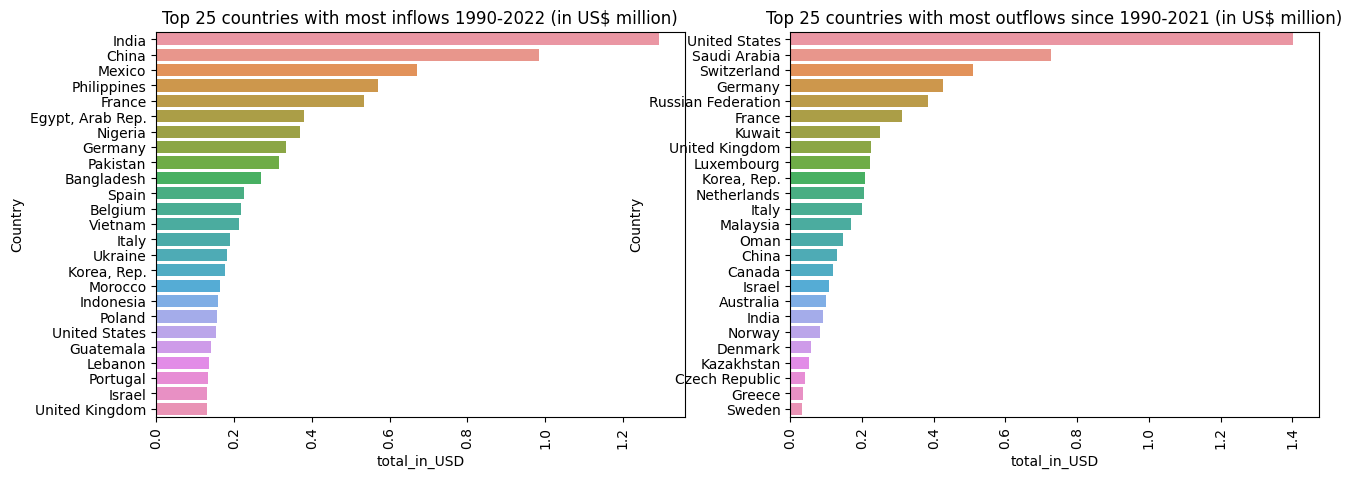

In [12]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x='total_in_USD', y='Country', data=inflow_top, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 25 countries with most inflows 1990-2022 (in US$ million)')

# Plot the second bar chart on the right subplot
sns.barplot(x='total_in_USD', y='Country', data=outflow_top, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Top 25 countries with most outflows since 1990-2021 (in US$ million)')

# Display the figure
plt.show()


To get more visuals, we combined the inflow dataset with country to continent dataset

In [13]:
# Get the subregion for each country
df_c = pd.read_csv('/content/countryContinent.csv',delimiter=',', encoding = "ISO-8859-1")
df_c.head()

,Country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,?land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [14]:
# Select `continent' and `sub_region` columns
df_c = df_c[['Country', 'sub_region']]
df_c.head()

,Country,sub_region
0,Afghanistan,Southern Asia
1,?land Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia


In [15]:
# Rename columns
inflow = inflow.rename(columns={'Migrant remittance inflows (US$ million)': 'Country'})
outflow = outflow.rename(columns={'Outward remittance flows (US$ million)': 'Country'})

In [16]:
# Merge the two dataframes
inflow_df = pd.merge(inflow, df_c, on='Country')
outflow_df = pd.merge(outflow,df_c, on='Country')
inflow_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,total_in_USD,sub_region
0,Afghanistan,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,6477.570209,Southern Asia
1,Albania,0.00000,0.000000,151.8,332.000000,307.100000,427.3,550.900000,300.300000,504.140000,...,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,33846.626379,Southern Europe
2,Algeria,352.44176,232.990263,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,19411.065029,Northern Africa
3,Angola,0.00000,0.000000,0.0,0.000000,0.000000,0.0,5.142000,0.000000,0.000000,...,11.114712,3.988048,1.418196,1.579247,3.445473,8.053051,12.631149,16.420494,272.210543,Middle Africa
4,Antigua and Barbuda,9.40000,0.000000,0.0,7.925926,8.614815,0.0,8.940741,9.537037,18.755556,...,31.244412,26.705676,24.020044,32.768265,36.955426,36.331448,50.142028,34.590023,659.036966,Caribbean


In [17]:
# Display the merged ouflow_df
outflow_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,total_in_USD,sub_region
0,Angola,150.000000,124.500000,121.637000,132.900000,148.900000,209.546000,173.802000,179.950000,201.650000,...,2746.615873,1252.909012,1176.110314,961.415276,681.627015,549.082043,576.471437,445.400144,19669.007913,Middle Africa
1,Argentina,0.000000,0.000000,142.800000,163.100000,176.600000,195.200000,207.300000,231.700000,246.500000,...,732.414557,685.001366,769.242058,1060.484530,1010.375536,694.899063,545.151525,588.559744,15331.397454,South America
2,Australia,601.367467,522.617129,457.806050,441.562934,487.695522,570.200000,728.177754,771.092538,796.700673,...,6953.239775,6037.610107,6179.374298,6793.253707,7267.729294,7439.097689,4358.562385,3804.212817,99531.791756,Australia and New Zealand
3,Belize,7.150000,5.700000,6.000000,6.000000,6.568500,6.881500,6.875000,7.550000,6.900000,...,33.269798,41.161361,45.202221,45.607620,42.979101,41.881052,42.407419,41.693205,691.902706,Central America
4,Benin,20.687582,20.727603,21.149125,21.458697,23.251785,26.484507,33.615323,17.064455,29.877018,...,144.363224,98.216933,88.136694,72.946194,94.458843,87.497447,92.063089,100.184329,1695.584546,Western Africa


In [18]:
# Group the countries by sub-region
grouped_inflow = inflow_df.groupby('sub_region')['total_in_USD'].sum().sort_values(ascending=False)
grouped_outflow = outflow_df.groupby('sub_region')['total_in_USD'].sum().sort_values(ascending=False)

### Visualization for Total Remittance inflows and outflows by sub-regions

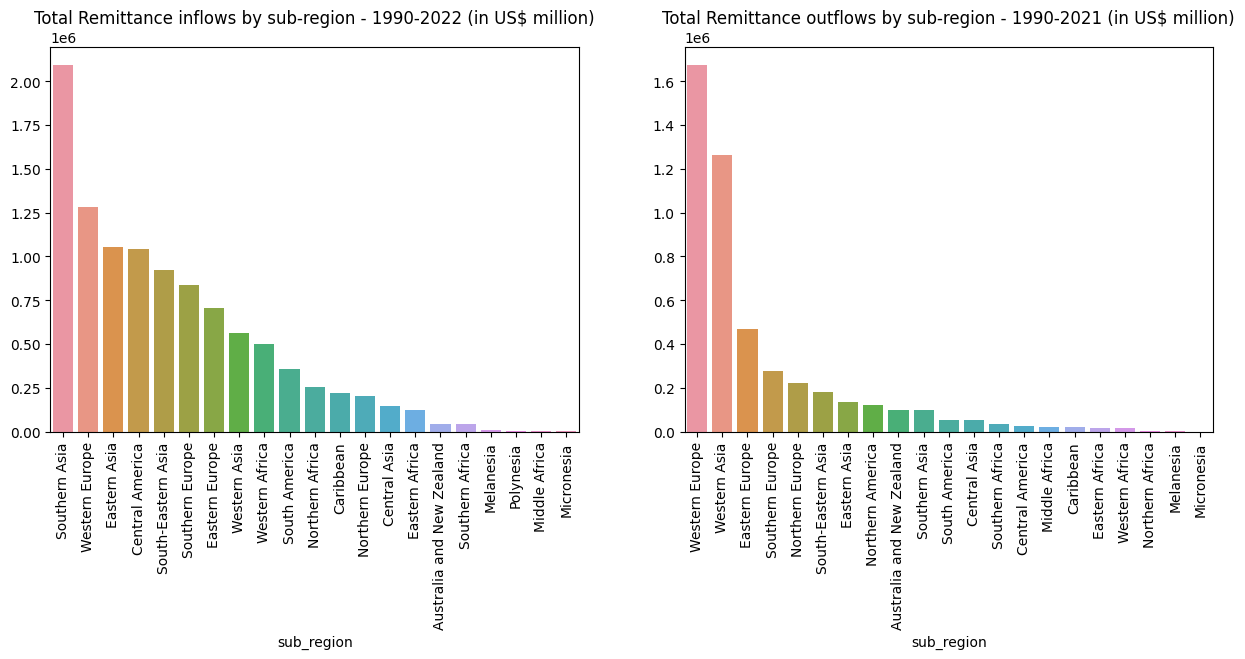

In [19]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x=grouped_inflow.index, y=grouped_inflow.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Total Remittance inflows by sub-region - 1990-2022 (in US$ million)')

# Plot the second bar chart on the right subplot
sns.barplot(x=grouped_outflow.index, y=grouped_outflow.values, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Total Remittance outflows by sub-region - 1990-2021 (in US$ million)')

# Display the figure
plt.show()

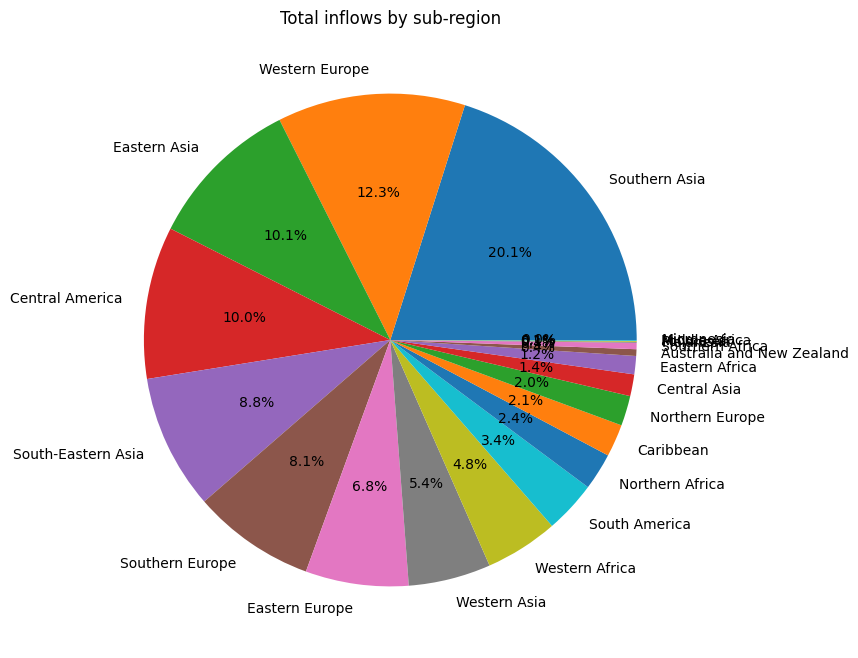

In [20]:
# Create a pie chart of the total inflows by sub-region
plt.figure(figsize=(8,8))
plt.pie(grouped_inflow.values, labels=grouped_inflow.index, autopct='%1.1f%%')
plt.title('Total inflows by sub-region')
plt.show()

In [21]:
# Drop column 'total_in_USD'
inflow_df = inflow_df.drop('total_in_USD', axis=1)

# Transpose the dataframe
inflow_df_t = inflow_df.T

In [22]:

# Get time values per country
inflow_df_t.columns = inflow_df_t.iloc[0]
inflow_df_t = inflow_df_t.drop(['Country', 'sub_region'])

# Get country name per sub region
country = []
sub_region = []

cont_region = pd.DataFrame()
for i in inflow_df['sub_region'].unique():
    country.append(inflow_df[inflow_df['sub_region'] == i]['Country'])
    sub_region.append(i)

In [23]:
sub_region

['Southern Asia',
 'Southern Europe',
 'Northern Africa',
 'Middle Africa',
 'Caribbean',
 'South America',
 'Western Asia',
 'Australia and New Zealand',
 'Western Europe',
 'Eastern Europe',
 'Central America',
 'Western Africa',
 'Southern Africa',
 'Eastern Africa',
 'South-Eastern Asia',
 'Eastern Asia',
 'Northern Europe',
 'Melanesia',
 'Central Asia',
 'Micronesia',
 'Polynesia']

In [24]:
#plot Remittance inflows for every country per sub-region
for i in range(len(sub_region)):
    
    fig = px.line(inflow_df_t[country[i]], 
                  title = sub_region[i], 
                  labels={
                      'index': '',
                      'value': ''
                  })
    fig.show()